# Example: Univariate Distributions
This notebook demonstrates how the univariate module can be used to model one-dimensional continuous distributions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from copulas.univariate import *

We'll start by generating some data from the normal distribution. We'll try to learn the distribution using some of the univariate models and plot the real and synthetic datasets.

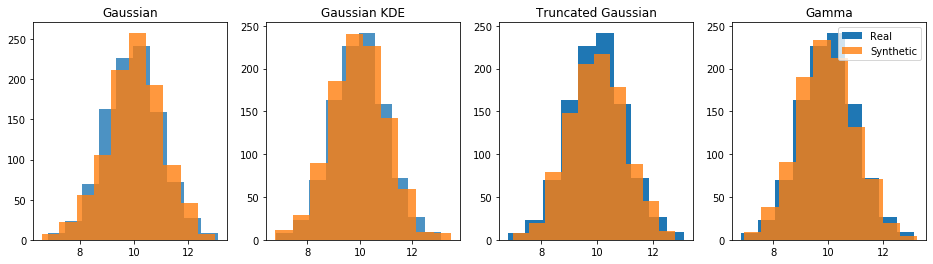

In [2]:
data = np.random.normal(loc=10.0, scale=1.0, size=1000)
def fit_and_sample(model):
    model.fit(data)
    return model.sample(1000).flatten()

plt.figure(figsize=(16,4))

plt.subplot(1, 4, 1)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianUnivariate()), alpha=0.8, label="Synthetic")
plt.title("Gaussian")

plt.subplot(1, 4, 2)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianKDE()), alpha=0.8, label="Synthetic")
plt.title("Gaussian KDE")

plt.subplot(1, 4, 3)
plt.hist(data, label="Real")
plt.hist(fit_and_sample(TruncatedGaussian()), alpha=0.8, label="Synthetic")
plt.title("Truncated Gaussian")

plt.subplot(1, 4, 4)
plt.hist(data, label="Real")
plt.hist(fit_and_sample(GammaUnivariate()), alpha=0.8, label="Synthetic")
plt.title("Gamma")


plt.legend()
plt.show()

We can do the same thing for a slightly more complicated distribution which has two modes. 

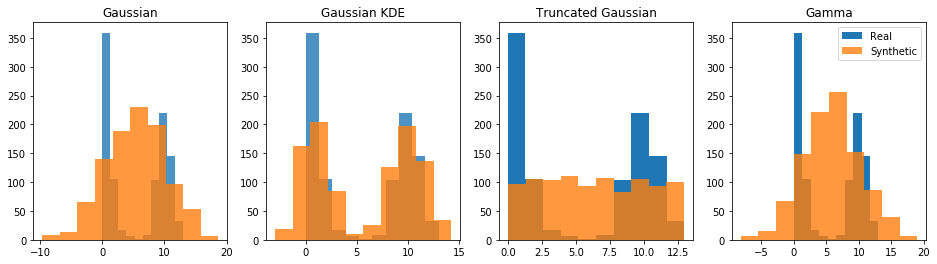

In [3]:
mask = np.random.randint(0, 2, size=1000)
data = np.random.exponential(size=1000)*mask + np.random.normal(loc=10.0, scale=1.0, size=1000)*(1-mask)
def fit_and_sample(model):
    model.fit(data)
    return model.sample(1000).flatten()

plt.figure(figsize=(16,4))

plt.subplot(1, 4, 1)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianUnivariate()), alpha=0.8, label="Synthetic")
plt.title("Gaussian")

plt.subplot(1, 4, 2)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(GaussianKDE()), alpha=0.8, label="Synthetic")
plt.title("Gaussian KDE")

plt.subplot(1, 4, 3)
plt.hist(data, label="Real")
plt.hist(fit_and_sample(TruncatedGaussian()), alpha=0.8, label="Synthetic")
plt.title("Truncated Gaussian")

plt.subplot(1, 4, 4)
plt.hist(data, label="Real")
plt.hist(fit_and_sample(GammaUnivariate()), alpha=0.8, label="Synthetic")
plt.title("Gamma")

plt.legend()
plt.show()

As the above histograms show, different univariate distributions are more suitable for different types of data. We provide a `select_univariate` method which uses the Kolmogorov–Smirnov test statistic to select the best fitting model. The below figure shows a few different data distributions and the univariate distribution that is selected for each.

Here are a few more examples of data distributions and the type of univariate distribution that will be automatically selected.

/Users/kevz/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/kevz/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


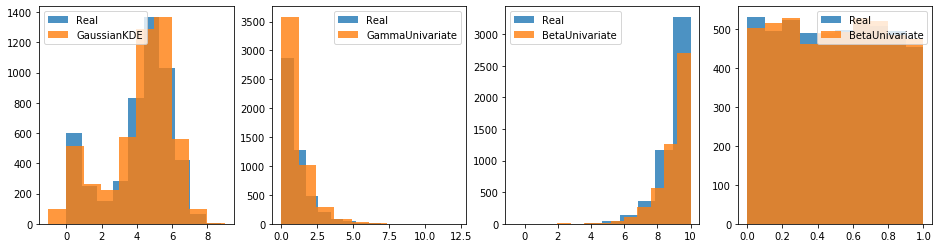

In [5]:
from copulas.univariate.selection import select_univariate

def fit_and_sample(model, data):
    model.fit(data)
    return model.sample(len(data)).flatten()

plt.figure(figsize=(16,4))

plt.subplot(1, 4, 1)
mask = np.random.randint(0, 5, size=5000) == 0
data = np.random.exponential(size=5000)*mask + np.random.normal(loc=5.0, scale=1.0, size=5000)*(1-mask)
model = select_univariate(data)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(model, data), alpha=0.8, label=type(model).__name__)
plt.legend()

plt.subplot(1, 4, 2)
data = np.random.exponential(size=5000)
model = select_univariate(data)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(model, data), alpha=0.8, label=type(model).__name__)
plt.legend()

plt.subplot(1, 4, 3)
data = 10.0 - np.random.exponential(size=5000)
model = select_univariate(data)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(model, data), alpha=0.8, label=type(model).__name__)
plt.legend()

plt.subplot(1, 4, 4)
data = np.random.uniform(size=5000)
model = select_univariate(data)
plt.hist(data, alpha=0.8, label="Real")
plt.hist(fit_and_sample(model, data), alpha=0.8, label=type(model).__name__)
plt.legend()

plt.show()